In [ ]:
!pip install GeoPandas
%matplotlib inline

import pandas as pd
import geopandas

In [ ]:
!pip install contextily
import contextily as ctx
import matplotlib.pyplot as plt

# 1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
parchi = geopandas.read_file("/content/drive/MyDrive/Parchi_regionali_e_nazionali_polygon.zip")
province =  geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")
quartieri = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm/NIL_WM.dbf")
corsi_acqua = geopandas.read_file("/content/drive/MyDrive/Corsi_acqua_Piano_di_Gestione.zip")
comuni = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Com01012021_g")

In [ ]:
provinciaMilano = province[province['DEN_UTS'] == 'Milano']
provinciaMilano

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09,"MULTIPOLYGON (((538136.289 5004372.814, 539162..."


In [ ]:
CorsiMilano = corsi_acqua[corsi_acqua.intersects(provinciaMilano.unary_union)]
CorsiMilano.count()

OBJECTID      45
COD_PTUA16    45
NATURA        45
REGIONE       45
NOME          45
SOTTOBACIN    45
TIPOLOGIA     38
A_PROTETTA    45
SENSIBILE     45
VULNERABIL    45
D_HABITAT     45
D_UCCELLI     45
RAMSAR        45
BALNEAZION    45
VITA_PESCI    45
USO_POTAB     45
AREE_A_PR     45
BACINO        45
RAGG_ECO      45
RAGG_CHI      45
STATO_ECO     45
CONF_ECO      43
STATO_CHI     45
CONF_CHI      43
ANNI_CHI      45
ANNI_ECO      45
OBB_CHI       45
OBB_ECO       45
ESENZIONI     45
SHAPE_LEN     45
geometry      45
dtype: int64

In [ ]:
CorsiPiuLunghi = CorsiMilano.sort_values('SHAPE_LEN', ascending=False).head(10)
CorsiPiuLunghi

,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry
18,124,IT03POTI3VICA1LO,artificiale,Lombardia,Villoresi (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,bassa,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,86549.137958,"MULTILINESTRING ((478097.612 5045956.958, 4780..."
36,593,IT03N00800112LO,naturale,Lombardia,Adda (Fiume),Adda Sub Lacuale (Asta),06GL3N,sì,sì,sì,sì,no,no,no,sì,no,sì,ADDA,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,61066.374854,"MULTILINESTRING ((541297.507 5041518.075, 5412..."
10,84,IT03POAD3MUCA1LO,artificiale,Lombardia,Muzza (Colatore),nd,None,sì,no,sì,no,no,no,no,no,no,sì,ADDA,no,no,sufficiente,bassa,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,60521.688952,"MULTILINESTRING ((541297.507 5041518.075, 5412..."
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627..."
7,65,ITIRN0080984IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,no,sì,TICINO,no,no,sufficiente,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,38206.257375,"MULTILINESTRING ((483579.882 5034726.498, 4835..."
31,501,IT03POLSSEMACA1LO,artificiale,Lombardia,Naviglio Martesana (Canale),nd,None,sì,no,sì,no,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,38123.487110,"LINESTRING (541227.887 5050214.931, 541227.203..."
26,357,IT03N008044002012LO,naturale,Lombardia,Olona (Fiume),Olona,06SS2D,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,cattivo,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,36885.391167,"MULTILINESTRING ((495438.399 5047188.843, 4954..."
8,66,ITIRN0080982IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,sì,sì,TICINO,no,no,buono,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,mantenimento dello stato buono,Nessuna proroga o deroga,35927.352062,"MULTILINESTRING ((477067.969 5044605.066, 4770..."
15,112,IT03N0080440022LO,naturale,Lombardia,Lambro Meridionale (Colatore),Lambro (Asta),06SS3D,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,35449.017426,"MULTILINESTRING ((516227.432 5021570.890, 5162..."
1,191,IT03POTI3SNCA1LO,artificiale,Lombardia,Scolmatore Piene Nord - Ovest (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,34035.857991,"MULTILINESTRING ((494060.091 5029696.046, 4940..."


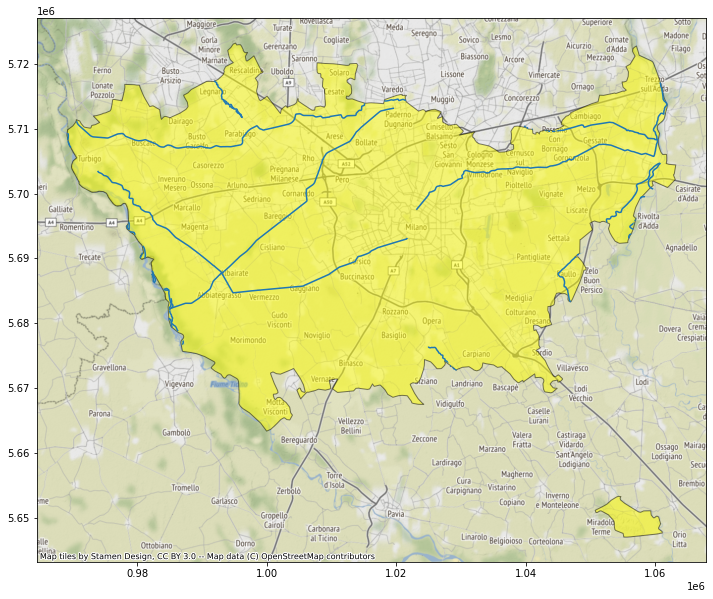

In [ ]:
ax= CorsiPiuLunghi.to_crs(epsg=3857).plot(figsize=(20,10))
provinciaMilano.to_crs(epsg=3857).plot(ax=ax, facecolor='Yellow', alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)

# 2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa


In [ ]:
Navigli= corsi_acqua[corsi_acqua.NOME.str.contains('Navigli')]
Navigli

,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627..."
31,501,IT03POLSSEMACA1LO,artificiale,Lombardia,Naviglio Martesana (Canale),nd,None,sì,no,sì,no,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,38123.487110,"LINESTRING (541227.887 5050214.931, 541227.203..."
32,398,IT03POTI3NPCA1LO,artificiale,Lombardia,Naviglio Pavese (Canale),nd,None,sì,no,sì,no,no,no,no,no,no,no,TICINO,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,33448.858573,"LINESTRING (513927.378 5033222.100, 513927.258..."
44,676,IT03N0080981411LO,naturale,Lombardia,Navigliaccio (Colatore),Ticino Sub Lacuale,06SS1N,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,NC,None,NC,None,2014,2014,buono al 2021,buono al 2021,Art. 4.4 per obiettivo ecologico e chimico,18105.747329,"LINESTRING (507915.612 5019743.337, 507917.175..."


In [ ]:
fiumi= corsi_acqua[corsi_acqua.touches(Navigli.unary_union)]
fiumi

,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry
6,282,IT03POLSRECA1LO,artificiale,Lombardia,Redefossi (Cavo),nd,06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,18403.681560,"LINESTRING (514894.561 5036362.164, 514898.993..."
20,170,IT03N0080011911303081LO,naturale,Lombardia,Vallone (Rio),Adda Sub Lacuale (Asta),06IN7N,sì,no,sì,no,no,no,no,no,no,no,ADDA,sì,sì,scarso,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,15071.263294,"LINESTRING (534665.365 5048814.505, 534665.277..."
22,323,IT03N00800110LO,naturale,Lombardia,Adda (Fiume),Adda Sub Lacuale (Asta),06GL2N,sì,sì,sì,no,no,no,no,sì,no,sì,ADDA,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,16721.551152,"MULTILINESTRING ((540405.663 5051150.915, 5404..."
28,448,IT03N008001091014LO,naturale,Lombardia,Seveso (Torrente),Seveso,06SS3D,sì,no,sì,no,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,no,no,cattivo,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,18469.448374,"LINESTRING (512157.688 5048463.394, 512157.976..."
39,619,IT03N0080440021LO,naturale,Lombardia,Lambro Meridionale (Colatore),Lambro (Asta),06SS3D,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,11169.001938,"LINESTRING (513185.093 5030112.328, 513188.599..."


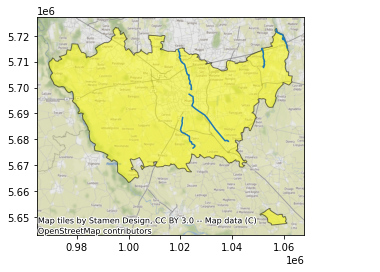

In [ ]:
ax = fiumi.to_crs(epsg=3857).plot()
provinciaMilano.to_crs(epsg=3857).plot(ax=ax, facecolor='Yellow', alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)

# 3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

inserire comune : Bresso


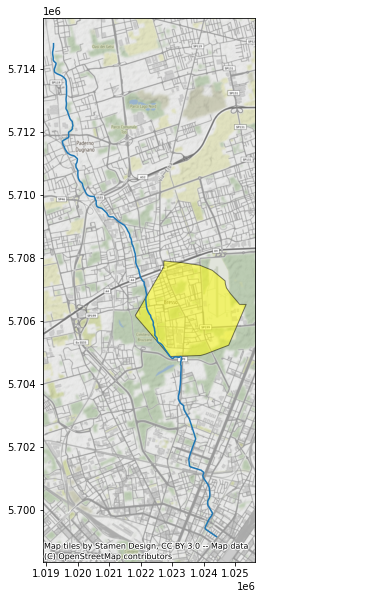

In [ ]:
user= input('inserire comune : ')
lst= list(comuni['COMUNE'])
if user not in lst:
  print('Comune inesistente')
else:
  comu= comuni[comuni.COMUNE == user]
  CorsiComune = corsi_acqua[corsi_acqua.intersects(comu.geometry.squeeze())]
  ax = CorsiComune.to_crs(epsg=3857).plot(figsize=(20,10))
  comu.to_crs(epsg=3857).plot(ax=ax, facecolor='Yellow', alpha=0.5, edgecolor='k')
  ctx.add_basemap(ax=ax)

# 4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa



inserire Fiume : Arno (Torrente)


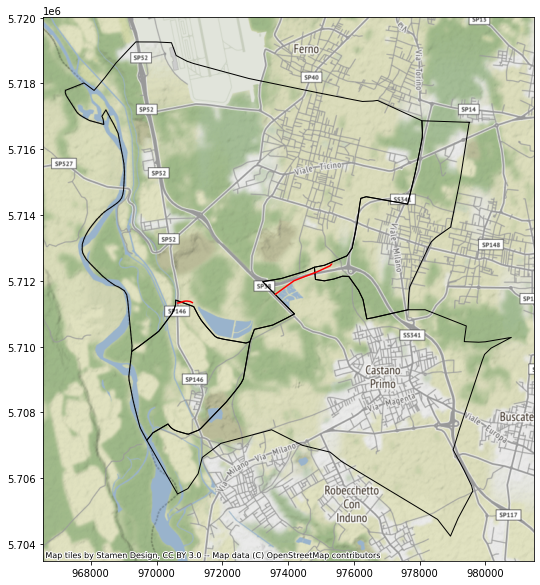

In [ ]:
user= input('inserire Fiume : ')
lst= list(corsi_acqua['NOME'])
if user not in lst:
  print('Fiume inesistente')
else:
  Fium = corsi_acqua[corsi_acqua.NOME == user]
  CorsiFiume = comuni[comuni.intersects(Fium.geometry.squeeze())]
  ax = CorsiFiume.to_crs(epsg=3857).plot(figsize=(20,10),facecolor='None',edgecolor='k')
  Fium.to_crs(epsg=3857).plot(ax=ax, edgecolor='r')
  ctx.add_basemap(ax=ax)

# 5. visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua


# 6. visualizzi su unamappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua
